# OLS with Time Series Data

## Time Series Data

Time series differ from cross-sectional data in that each observation corresponds to one point or period in time, hence intertemporal correlations should also be considered while building the model.

## 1. Static Time Series Models

Static time series regression model treats a time series model the same as a cross-sectional model, i.e.

$$y_t = \beta_0 + \beta_1 x_{1t} + \beta_2 x_{2t} + \dots + u_t$$

In this specification, the fact that we have time series does not make any practical difference. This is a valid model, if the dependent variable is a flow- instead of stock- variable -- The acceleration of a car at time t+1 has nothing to do with its acceleration at time t.

We can still use **ols** from **statsmodels** to estimate the parameters and the other tools for statistical inference. We only have to be aware that the assumptions needed for unbiased estimation and valid inference differ somewhat. Important differences to cross-sectional data are that we have a potential omitted variable bias (if y dependents on its previous values), and a potential serial correlation.

As an example, the static Phillips curve describes the contemporaneous trade-off between inflation and unemployment rate.
$$inflation_t = \beta_0 +\beta_1 unemployment_t + u$$

Exercise: The dataset INTDEF contains yearly information on interest rates and related time series between 1948 and 2003. Try to estimates a static model explaining the relationship of interest rate **i3** with the inflation rate **inf** and the federal budget deficit **def**. 

In [1]:
import wooldridge as woo
import statsmodels.formula.api as smf
df = woo.data("intdef")

#Q() avoids conflicts with keywords
reg = smf.ols("i3~Q('inf')+Q('def')", data=df)
res = reg.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                     i3   R-squared:                       0.602
Model:                            OLS   Adj. R-squared:                  0.587
Method:                 Least Squares   F-statistic:                     40.09
Date:                Wed, 27 Apr 2022   Prob (F-statistic):           2.48e-11
Time:                        13:34:53   Log-Likelihood:                -112.16
No. Observations:                  56   AIC:                             230.3
Df Residuals:                      53   BIC:                             236.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.7333      0.432      4.012      0.0

## 2. Dealing with Time Series Data using Pandas



Before we introduce other time series models, let's first take a look at how to generate lags, trends, and seasonal effects using **pandas**.

### Equispaced Time Series

pandas DataFrame provide convenient ways to deal with equispaced time series. Instead of create a new time column, we can use the **[date_range](https://pandas.pydata.org/docs/reference/api/pandas.date_range.html)** function to create a new time index for the data frame. 

```python
df.index = pd.date_range(start='1978-02', periods=30, freq='M')
```

There four important arguments for `pd.date_range()` function 

- start/end: Left/ right bound of the timeframe is accepted in different formats. All examples create the same starting/ending date.

    - start='1978-02'
    - start='1978-02-01'
    - start='02/01/1978'
    - start='2/1/1978'

- periods: Number of equispaced points in time you need to generate
- freq: Number of observations per time unit. Examples:
    - freq='Y': Yearly data (at the end of a year)
    - freq='QS': Quarterly data (at the beginning of a quarter)
    - freq='M': Monthly data(at the end of a month)

> You need to specify at least 3 arguments.


Example: consider the data set *BARIUM*. It contains monthly data on imports of barium chloride from China between February 1978 and December 1988. 

In [2]:
import wooldridge as woo
import pandas as pd

df = woo.data("barium")
df.head()

,chnimp,bchlimp,befile6,affile6,afdec6,befile12,affile12,afdec12,chempi,gas,...,apr,may,jun,jul,aug,sep,oct,nov,dec,percchn
0,220.462006,9578.375977,0,0,0,0,0,0,100.099998,7.830000e+09,...,0,0,0,0,0,0,0,0,0,2.301664
1,94.797997,11219.480469,0,0,0,0,0,0,100.900002,8.820000e+09,...,0,0,0,0,0,0,0,0,0,0.844941
2,219.357498,9719.900391,0,0,0,0,0,0,101.099998,8.450000e+09,...,1,0,0,0,0,0,0,0,0,2.256788
3,317.421509,12920.950195,0,0,0,0,0,0,102.500000,9.240001e+09,...,0,1,0,0,0,0,0,0,0,2.456642
4,114.639000,9790.446289,0,0,0,0,0,0,104.099998,9.150000e+09,...,0,0,1,0,0,0,0,0,0,1.170927


In [3]:
pd.date_range("1978-02","1988-12",freq="M")

DatetimeIndex(['1978-02-28', '1978-03-31', '1978-04-30', '1978-05-31',
               '1978-06-30', '1978-07-31', '1978-08-31', '1978-09-30',
               '1978-10-31', '1978-11-30',
               ...
               '1988-02-29', '1988-03-31', '1988-04-30', '1988-05-31',
               '1988-06-30', '1988-07-31', '1988-08-31', '1988-09-30',
               '1988-10-31', '1988-11-30'],
              dtype='datetime64[ns]', length=130, freq='M')

In [4]:
df.index = pd.date_range("1978-02",periods=len(df),freq="M")
df.head()

,chnimp,bchlimp,befile6,affile6,afdec6,befile12,affile12,afdec12,chempi,gas,...,apr,may,jun,jul,aug,sep,oct,nov,dec,percchn
1978-02-28,220.462006,9578.375977,0,0,0,0,0,0,100.099998,7.830000e+09,...,0,0,0,0,0,0,0,0,0,2.301664
1978-03-31,94.797997,11219.480469,0,0,0,0,0,0,100.900002,8.820000e+09,...,0,0,0,0,0,0,0,0,0,0.844941
1978-04-30,219.357498,9719.900391,0,0,0,0,0,0,101.099998,8.450000e+09,...,1,0,0,0,0,0,0,0,0,2.256788
1978-05-31,317.421509,12920.950195,0,0,0,0,0,0,102.500000,9.240001e+09,...,0,1,0,0,0,0,0,0,0,2.456642
1978-06-30,114.639000,9790.446289,0,0,0,0,0,0,104.099998,9.150000e+09,...,0,0,1,0,0,0,0,0,0,1.170927


The datetime elements in the date_range column belong to a class called [pandas.Timestamp](https://pandas.pydata.org/docs/reference/api/pandas.Timestamp.html#pandas.Timestamp).

In [5]:
pd.date_range("1978-02",periods=len(df),freq="M").year

Int64Index([1978, 1978, 1978, 1978, 1978, 1978, 1978, 1978, 1978, 1978,
            ...
            1988, 1988, 1988, 1988, 1988, 1988, 1988, 1988, 1988, 1988],
           dtype='int64', length=131)

In [6]:
df.index = pd.date_range("1978-02",periods=len(df),freq="M")
df.head()

,chnimp,bchlimp,befile6,affile6,afdec6,befile12,affile12,afdec12,chempi,gas,...,apr,may,jun,jul,aug,sep,oct,nov,dec,percchn
1978-02-28,220.462006,9578.375977,0,0,0,0,0,0,100.099998,7.830000e+09,...,0,0,0,0,0,0,0,0,0,2.301664
1978-03-31,94.797997,11219.480469,0,0,0,0,0,0,100.900002,8.820000e+09,...,0,0,0,0,0,0,0,0,0,0.844941
1978-04-30,219.357498,9719.900391,0,0,0,0,0,0,101.099998,8.450000e+09,...,1,0,0,0,0,0,0,0,0,2.256788
1978-05-31,317.421509,12920.950195,0,0,0,0,0,0,102.500000,9.240001e+09,...,0,1,0,0,0,0,0,0,0,2.456642
1978-06-30,114.639000,9790.446289,0,0,0,0,0,0,104.099998,9.150000e+09,...,0,0,1,0,0,0,0,0,0,1.170927


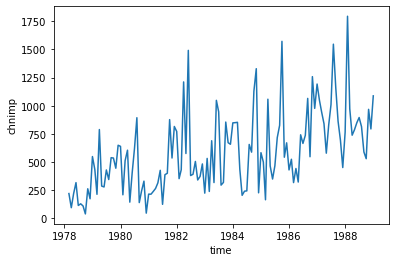

In [7]:
import matplotlib.pyplot as plt
plt.plot(df["chnimp"]) # if only one series is provided, index is used by default
plt.ylabel("chnimp")
plt.xlabel("time")
plt.show()

> Another function called pd.bdate_range() using business days by default.

### Custom frequency ranges

bdate_range() can also generate a range of custom frequency dates by using the `weekmask` and `holidays` parameters. These parameters will only be used if a custom frequency string is passed.

In [8]:
weekmask = "Mon Wed Fri"
holidays = ["2021-11-22"]
# use freq="C" for custom frequencies
pd.bdate_range(start="2021-11-01", end="2021-12-01", freq="C", weekmask=weekmask, holidays=holidays)

DatetimeIndex(['2021-11-01', '2021-11-03', '2021-11-05', '2021-11-08',
               '2021-11-10', '2021-11-12', '2021-11-15', '2021-11-17',
               '2021-11-19', '2021-11-24', '2021-11-26', '2021-11-29',
               '2021-12-01'],
              dtype='datetime64[ns]', freq='C')

### Convert to Datetime

To convert a Series or list-like object of date-like objects, you can use the pd.to_datetime() function. When passed a Series, this returns a Series (with the same index), while a list-like is converted to a DatetimeIndex:

In [9]:
pd.to_datetime(pd.Series(["Jul 31, 2009", "2010-01-10", None]))

0   2009-07-31
1   2010-01-10
2          NaT
dtype: datetime64[ns]

In [10]:
pd.to_datetime(["Jul 31, 2009", "2010-01-10", None])

DatetimeIndex(['2009-07-31', '2010-01-10', 'NaT'], dtype='datetime64[ns]', freq=None)

If the string format is irregular, you can also provide a format string. A complete list of datetime format can be found [here](https://docs.python.org/3/library/datetime.html#strftime-and-strptime-behavior)

In [11]:
pd.to_datetime(["2021/11/22","2021/11/23"], format="%Y/%m/%d")

DatetimeIndex(['2021-11-22', '2021-11-23'], dtype='datetime64[ns]', freq=None)

In [12]:
pd.to_datetime(["Nov 22 of 2021","Nov 23 of 2021"], format="%b %d of %Y")

DatetimeIndex(['2021-11-22', '2021-11-23'], dtype='datetime64[ns]', freq=None)

### Assembling datetime from multiple DataFrame column
You can also pass a DataFrame of integer or string columns to assemble into a Series of Timestamps.

In [13]:
df = pd.DataFrame({"year": [2015, 2016], "month": [2, 3], "day": [4, 5], "hour": [2, 3]})
df

,year,month,day,hour
0,2015,2,4,2
1,2016,3,5,3


In [14]:
pd.to_datetime(df[["year","month","day","hour"]])

0   2015-02-04 02:00:00
1   2016-03-05 03:00:00
dtype: datetime64[ns]

### Using the origin Parameter
Using the origin parameter, one can specify an alternative starting point for creation of a DatetimeIndex. For example, to use 1960-01-01 as the starting date:

In [15]:
pd.to_datetime([1, 2, 3], unit="D", origin="1960-01-01")

DatetimeIndex(['1960-01-02', '1960-01-03', '1960-01-04'], dtype='datetime64[ns]', freq=None)

> Check [here](https://pandas.pydata.org/docs/user_guide/timeseries.html#timeseries-offset-aliases) for a list of frequency aliases.

### Stock Data

Daily financial data sets are important examples of irregular time series.  Because of weekends and bank holidays, these data are not equispaced and each data point contains a time stamp - usually the date. To demonstrate this, we will briefly look at the module **pandas_datareader** to download financial data from Yahoo Finance.

You can find the documentation for using [pandas_datareader](https://pydata.github.io/pandas-datareader/devel/remote_data.html#remote-data-yahoo) to access remote data sources. The pdr.data.DataReader() function takes four arguments.
1. ticker list
2. source
3. start_date
4. end_date

Example: Download stock data for Ford Motor Company from 2021-01-01 to date.

In [47]:
import pandas_datareader as pdr
from datetime import date

tickers = ["TSLA"]
start_date = "2022-01-01"
end_date = date.today()

df = pdr.data.DataReader(tickers, "yahoo", start_date, end_date)
df.head()

Attributes,Adj Close,Close,High,Low,Open,Volume
Symbols,TSLA,TSLA,TSLA,TSLA,TSLA,TSLA
Date,,,,,,
2022-01-03,1199.780029,1199.780029,1201.069946,1136.040039,1147.750000,34643800
2022-01-04,1149.589966,1149.589966,1208.000000,1123.050049,1189.550049,33416100
2022-01-05,1088.119995,1088.119995,1170.339966,1081.010010,1146.650024,26706600
2022-01-06,1064.699951,1064.699951,1088.000000,1020.500000,1077.000000,30112200
2022-01-07,1026.959961,1026.959961,1080.930054,1010.000000,1080.369995,28054900


In [48]:
df["Adj Close"].values.squeeze()

array([1199.7800293 , 1149.58996582, 1088.11999512, 1064.69995117,
       1026.95996094, 1058.11999512, 1064.40002441, 1106.2199707 ,
       1031.56005859, 1049.60998535, 1030.51000977,  995.65002441,
        996.27001953,  943.90002441,  930.        ,  918.40002441,
        937.40997314,  829.09997559,  846.34997559,  936.7199707 ,
        931.25      ,  905.65997314,  891.14001465,  923.32000732,
        907.34002686,  922.        ,  932.        ,  904.54998779,
        860.        ,  875.76000977,  922.42999268,  923.39001465,
        876.34997559,  856.97998047,  821.5300293 ,  764.03997803,
        800.77001953,  809.86999512,  870.42999268,  864.36999512,
        879.89001465,  839.28997803,  838.28997803,  804.58001709,
        824.40002441,  858.9699707 ,  838.29998779,  795.34997559,
        766.36999512,  801.89001465,  840.22998047,  871.59997559,
        905.39001465,  921.15997314,  993.97998047,  999.10998535,
       1013.91998291, 1010.64001465, 1091.83996582, 1099.56994

In [49]:
df = pd.DataFrame({"price":df["Adj Close"].values.squeeze()})

In [50]:
df.head()

,price
0,1199.780029
1,1149.589966
2,1088.119995
3,1064.699951
4,1026.959961


In [51]:
df["price_l1"] = df["price"].shift(1)

In [53]:
df["pct_change"] = (df["price"]-df["price_l1"])/df["price"]

In [59]:
df["price"].rolling(2).mean()

0             NaN
1     1174.684998
2     1118.854980
3     1076.409973
4     1045.829956
         ...     
76    1006.915009
77    1001.535004
78     937.220001
79     878.964996
80     872.364990
Name: price, Length: 81, dtype: float64

In [55]:
df["price"].pct_change()

0          NaN
1    -0.041833
2    -0.053471
3    -0.021523
4    -0.035447
        ...   
76   -0.003698
77   -0.006995
78   -0.121841
79    0.005808
80   -0.020749
Name: price, Length: 81, dtype: float64

In [57]:
df["pct_change"].fillna(method="bfill")

0    -0.043659
1    -0.043659
2    -0.056492
3    -0.021997
4    -0.036749
        ...   
76   -0.003711
77   -0.007044
78   -0.138746
79    0.005774
80   -0.021188
Name: pct_change, Length: 81, dtype: float64

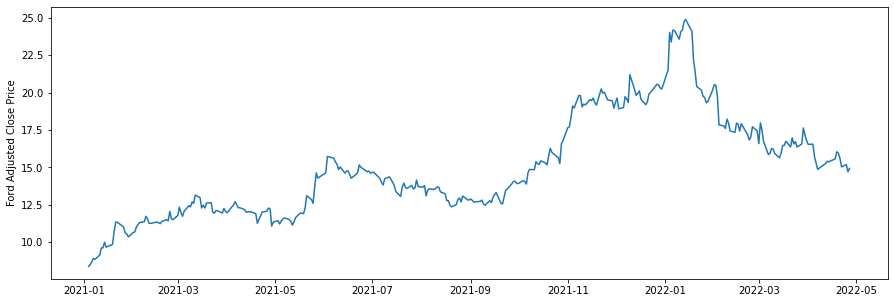

In [18]:
plt.figure(figsize=(15,5))
plt.plot(df_F["Adj Close"])
plt.ylabel("Ford Adjusted Close Price")
plt.show()

## 3. Finite Distributed Lag Models

Finite distributed lag (FDL) models allow past values of *regressors* to affect the dependent variable. A FDL model of order q with an independent variable x can be written as

$$y_t = \alpha_0 + \delta_0 x_t + \delta_1 x_{t-1} + \dots + \delta_q x_{t-q} + u$$

> Past values of the dependent variable are still not modeled.



Wooldridge (Section 10.2) discusses the specification and interpretation of such models. For its implementation, we first need to generate the q additional lagged variables. 
> Be aware that this only works if rows are sorted in an ascending order by the time variable. `df.sort_values(by=['time_var'])`

We can then use `df["varname"].shift()` to create lags

Example: The data set *FERTIL3* contains yearly information on the general fertility rate (**gfr**) and the personal tax exemption (**pe**) for the years 1913 through 1984. Dummy variables for the second world war (**ww2**) and the availability of the birth control pill (**pill**) are also included. Let's build a distributed lag model including using **pe** and two lags to explain **gfr**. 

In [19]:
import statsmodels.formula.api as smf

df = woo.data("fertil3")
df.head()

,gfr,pe,year,t,tsq,pe_1,pe_2,pe_3,pe_4,pill,...,cpe_1,cpe_2,cpe_3,cpe_4,gfr_1,cgfr_1,cgfr_2,cgfr_3,cgfr_4,gfr_2
0,124.699997,0.00,1913,1,1,NaN,NaN,NaN,NaN,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,126.599998,0.00,1914,2,4,0.0,NaN,NaN,NaN,0,...,NaN,NaN,NaN,NaN,124.699997,NaN,NaN,NaN,NaN,NaN
2,125.000000,0.00,1915,3,9,0.0,0.0,NaN,NaN,0,...,0.0,NaN,NaN,NaN,126.599998,1.900002,NaN,NaN,NaN,124.699997
3,123.400002,0.00,1916,4,16,0.0,0.0,0.0,NaN,0,...,0.0,0.0,NaN,NaN,125.000000,-1.599998,1.900002,NaN,NaN,126.599998
4,121.000000,19.27,1917,5,25,0.0,0.0,0.0,0.0,0,...,0.0,0.0,0.0,NaN,123.400002,-1.599998,-1.599998,1.900002,NaN,125.000000


In [20]:
df.index = df["year"]
df

,gfr,pe,year,t,tsq,pe_1,pe_2,pe_3,pe_4,pill,...,cpe_1,cpe_2,cpe_3,cpe_4,gfr_1,cgfr_1,cgfr_2,cgfr_3,cgfr_4,gfr_2
year,,,,,,,,,,,,,,,,,,,,,
1913,124.699997,0.000000,1913,1,1,NaN,NaN,NaN,NaN,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1914,126.599998,0.000000,1914,2,4,0.000000,NaN,NaN,NaN,0,...,NaN,NaN,NaN,NaN,124.699997,NaN,NaN,NaN,NaN,NaN
1915,125.000000,0.000000,1915,3,9,0.000000,0.000000,NaN,NaN,0,...,0.000000,NaN,NaN,NaN,126.599998,1.900002,NaN,NaN,NaN,124.699997
1916,123.400002,0.000000,1916,4,16,0.000000,0.000000,0.000000,NaN,0,...,0.000000,0.000000,NaN,NaN,125.000000,-1.599998,1.900002,NaN,NaN,126.599998
1917,121.000000,19.270000,1917,5,25,0.000000,0.000000,0.000000,0.000000,0,...,0.000000,0.000000,0.000000,NaN,123.400002,-1.599998,-1.599998,1.900002,NaN,125.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1980,68.400002,123.169998,1980,68,4624,132.929993,118.980003,116.110001,120.080002,1,...,13.949989,2.870003,-3.970001,-2.279999,67.199997,1.699997,-1.300003,1.000000,-0.199997,65.500000
1981,67.400002,119.309998,1981,69,4761,123.169998,132.929993,118.980003,116.110001,1,...,-9.759995,13.949989,2.870003,-3.970001,68.400002,1.200005,1.699997,-1.300003,1.000000,67.199997
1982,67.300003,102.040001,1982,70,4900,119.309998,123.169998,132.929993,118.980003,1,...,-3.860001,-9.759995,13.949989,2.870003,67.400002,-1.000000,1.200005,1.699997,-1.300003,68.400002


In [21]:
# Generate lags

df["pe_l1"] =df["pe"].shift(1)
df["pe_l2"] =df["pe"].shift(2)

In [22]:
# regression

reg = smf.ols("gfr~pe + pe_l1 + pe_l2 + ww2 + pill", data=df)
res = reg.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                    gfr   R-squared:                       0.499
Model:                            OLS   Adj. R-squared:                  0.459
Method:                 Least Squares   F-statistic:                     12.73
Date:                Wed, 27 Apr 2022   Prob (F-statistic):           1.35e-08
Time:                        13:34:55   Log-Likelihood:                -282.26
No. Observations:                  70   AIC:                             576.5
Df Residuals:                      64   BIC:                             590.0
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     95.8705      3.282     29.211      0.0

> Task: Are coefficients on pe and its lags significantly different from 0? Try to conduct an F-test to test joint significance of all pe related coefficients. What do you find?

In [23]:
res.f_test(["pe","pe_l1","pe_l2"])

<class 'statsmodels.stats.contrast.ContrastResults'>
<F test: F=array([[3.97296405]]), p=0.011652005303127183, df_denom=64, df_num=3>

> This points to a multicollinearity problem.

## 4. Trends
Many economic time series have a common tendency of growing over time. We must recognize that some series contain a time trend in order to draw causal inference using time series data.

![trend](./images/trend.png)

The above figure contains a plot of labor productivity (output per hour of work) in the United States for the years 1947 through 1987. This series displays a clear upward trend, which reflects the fact that workers have become more productive over time.

What kind of statistical models adequately capture trending behavior? One popular formulation is to write the model as

$$y_t = \alpha_0 + \alpha_1 t + u_t$$

Many economic time series are better approximated by an exponential trend, which follows when a series has the same average growth rate from period to period. Figure 10.3 plots data on annual nominal imports for the United States during the years 1948 through 1995 (ERP 1997, Table B-101).

>![trend2](./images/trend2.png)

In this case, we can rewrite the model as

$$log(y_t) = \alpha_0 + \alpha_1 t + u_t$$

Moreover, adding time trends can potentially fix the **spurious regression** problem, where both y and x increases over time, but there is no relationship between them.

Example: The data in *HSEINV* are annual observations on housing investment and a housing price index in the United States for 1947 through 1988. Let **invpc** denote real per capita housing investment (in thousands of dollars) and let **price** denote a housing price index (equal to 1 in 1982). A simple regression in constant elasticity form, which can be thought of as a supply equation for housing stock can be modeled as
$$lprice=\beta_0 + \beta_1 linvpc$$

In [24]:
df = woo.data("HSEINV")
df.head()

,year,inv,pop,price,linv,lpop,lprice,t,invpc,linvpc,lprice_1,linvpc_1,gprice,ginvpc
0,1947,54864.0,144126.0,0.8190,10.912613,11.878443,-0.199671,1,0.380667,-0.965831,NaN,NaN,NaN,NaN
1,1948,64717.0,146631.0,0.8649,11.077779,11.895675,-0.145141,2,0.441360,-0.817895,-0.199671,-0.965831,0.054530,0.147935
2,1949,63150.0,149188.0,0.8456,11.053268,11.912963,-0.167709,3,0.423291,-0.859694,-0.145141,-0.817895,-0.022567,-0.041799
3,1950,86014.0,151684.0,0.8765,11.362266,11.929555,-0.131819,4,0.567060,-0.567289,-0.167709,-0.859694,0.035890,0.292405
4,1951,70610.0,154287.0,0.8819,11.164927,11.946569,-0.125677,5,0.457654,-0.781643,-0.131819,-0.567289,0.006142,-0.214353


In [25]:
reg = smf.ols("lprice~linvpc", data=df)
res = reg.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                 lprice   R-squared:                       0.208
Model:                            OLS   Adj. R-squared:                  0.189
Method:                 Least Squares   F-statistic:                     10.53
Date:                Wed, 27 Apr 2022   Prob (F-statistic):            0.00238
Time:                        13:34:55   Log-Likelihood:                 61.618
No. Observations:                  42   AIC:                            -119.2
Df Residuals:                      40   BIC:                            -115.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0185      0.036      0.519      0.6

The elasticity of per capita investment with respect to price is very large and statistically significant. We must be careful here. Both **invpc** and **price** have upward trends, so the previous regression might demonstrate comovement instead causal relationship.

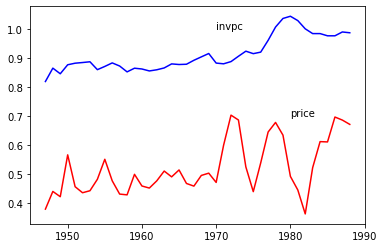

In [26]:
plt.plot("year","invpc",data=df, c="r")
plt.text(1970,1.0, s="invpc")
plt.plot("year","price",data=df,c="b")
plt.text(1980,0.7, s="price")
plt.show()

In [27]:
reg = smf.ols("lprice~linvpc+t",data=df)
res = reg.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                 lprice   R-squared:                       0.731
Model:                            OLS   Adj. R-squared:                  0.717
Method:                 Least Squares   F-statistic:                     53.02
Date:                Wed, 27 Apr 2022   Prob (F-statistic):           7.53e-12
Time:                        13:34:55   Log-Likelihood:                 84.293
No. Observations:                  42   AIC:                            -162.6
Df Residuals:                      39   BIC:                            -157.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.2061      0.033     -6.196      0.0

The story is much different now: the estimated price elasticity is negative and not statis- tically different from zero. The time trend is statistically significant, and its coefficient implies an approximate 1% increase in invpc per year, on average.

Including a time trend in a regression model creates a nice interpretation in terms of detrending the original data series before using them in regression analysis. 

## 5. Seasonality
Sometimes, we need to account for seasonal effects while building the regression model. For example, retail sales in the fourth quarter are typically higher than in the previous three quarters because of the Christmas holiday. To account for seasonality, we can add dummy variables for seasons. 